In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [137]:
import numpy as np

class Graf:
    def __init__(self, params_drawing = {}, storage_method = 'list'):
        """
        Input:
            params_drawing --- the dict with params for drawing
            storage_method --- the bool variable to choose the method of the vertices' storing
                               'list', 'matrix', 'both'
        """
        self.stor_method = storage_method
        self.list = list()     # adjacency List
        self.AM = None         # adjacency Matrix
        self.keys_idx = dict()
        self.idx_keys = dict()  
        self.params_drawing = {'font_size': 15, 'node_size' : 1000, 'node_color' : 'black', 'font_color' : 'w', 'font_weight': 'bold'}
        self.m = 0    #num of the edges
        self.n = 0    #num of the vertices
        
        self.params_drawing.update(params_drawing)
        print(self.params_drawing)
      
    def _addTo_graf_list(self):
            self.list.append([])

    
    def _addTo_graf_matrix(self):
        if self.AM is not None:
            self.AM = np.hstack((self.AM, np.zeros((self.AM.shape[0], 1)) ))
            self.AM = np.vstack((self.AM, np.zeros((1, self.AM.shape[1])) ))
        else:
            self.AM = np.zeros((1, 1))

            
    def _add_adj_to_list(self, idx, vertices):
        #proccesing for a set og the vertices
        if type(vertices) is not int and type(vertices) is not str:
            for v in vertices:
                flag = True
                for el in self.list[idx]:
                    if v == el:
                        flag = False
                        break
                if flag:
                    self.list[idx].append(v)
                
            flag = True
            for v in vertices:
                flag = True
                for el in self.list[v]:
                    if el == idx:
                        flag = False
                        break
                if flag:
                    self.list[v].append(idx)  
                    
        #proccesing for the only vertise
        else:
            flag = True
            for el in self.list[idx]:
                if vertices == el:
                    flag = False
                    break
            if flag: 
                self.list[idx].append(vertices)
            
            flag = True
            for el in self.list[vertices]:
                if idx == el:
                    flag = False
                    break
            if flag:
                self.list[vertices].append(idx)
            
    
    
    def _add_adj_to_matrix(self, idx, vertices):
        self.AM[idx, vertices] = 1
        self.AM[vertices, idx] = 1
        
    
    def _keys_to_indexis(self, keys):
        if type(keys) is tuple:
            return [self.keys_idx.get(el) for el in keys]
        else:
            return self.keys_idx.get(keys)
    
    
    def add_v(self, *args):
        """
        Input:
            args --- tuple of points (v1, v2, ... v_k)
        """
        for v in args:
            # adding each new point to the dicts
            self.keys_idx.setdefault(v, self.n)
            self.idx_keys.setdefault(self.n, v)
            
            #expanding the storage objects
            self._addTo_graf_list()
            self._addTo_graf_matrix()
            self.n += 1
    
        
    def add_adj(self, data):
        """ 
        Input: 
            data --- dict( key_1: (v1, v2, ...), ..., key_k: (v1, v2...) )
        where: 
            - key_i - any vertices in the graf
            - {v_n} - the set of some vertices that we want to make adjacent with vertex key_i
        """ 
        for key in data:
            #transforming 'names' receiving from the user to the indexes
            idx = self.keys_idx.get(key)
            idxs_adj = self._keys_to_indexis(data[key])
            
            #adding the edges to the storage objects
            self._add_adj_to_list(idx, idxs_adj)
            self._add_adj_to_matrix(idx, idxs_adj)
        
        
    def print(self):
        """
        Printing the incidence list
        """
        for i, row in enumerate(self.list):
            print(self.idx_keys.get(i), ' : ', tuple([self.idx_keys.get(k) for k in row]))
    
    
    def draw(self):
        """
        Drawing the graph with the special library fot it
        """
        K=nx.Graph(self.AM)
        nx.draw(K, labels = self.idx_keys, font_size= self.params_drawing.get('font_size'),\
                node_size=self.params_drawing.get('node_size'), node_color=self.params_drawing.get('node_color'),
                font_color=self.params_drawing.get('font_color'), font_weight=self.params_drawing.get('font_weight'))
        
            
    def set_dictance(self, points, dictances):
        pass
    
    def remove_v(self, *args):
        pass
    
    def remove_adj(self, *args):
        pass
    

In [138]:
G = Graf({'node_color': 'yellow', 'font_color': 'b'})
G.add_v('Root', 'A', 'B', 'C', 'D', 'E', 'F')
G.add_adj({'Root' : ('A', 'B', 'C', 'D', 'E', 'F'), 'C':'D'})

{'font_size': 15, 'node_size': 1000, 'node_color': 'yellow', 'font_color': 'b', 'font_weight': 'bold'}


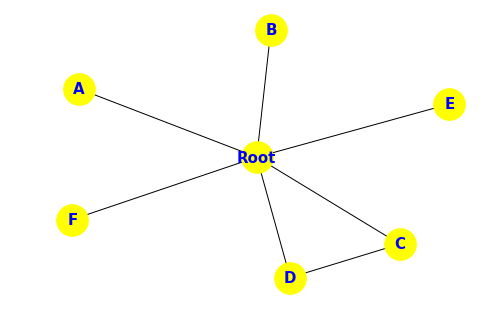

In [139]:
G.draw()

In [140]:
G.print()

Root  :  ('A', 'B', 'C', 'D', 'E', 'F')
A  :  ('Root',)
B  :  ('Root',)
C  :  ('Root', 'D')
D  :  ('Root', 'C')
E  :  ('Root',)
F  :  ('Root',)


In [141]:
G.AM

array([[0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])